In [5]:
from fairPCA import StreamingFairBlockPCA, sin, grassmanian_distance
import matplotlib.pyplot as plt
import jax.numpy as np
from jax import random

Algo = StreamingFairBlockPCA(
    data_dim=100,
    probability=0.2,
    nullity=0,  # nullity of Sigma_gap
    seed=None,
    eps=0.1,
    mu_scale=0.1,
    max_cov_eig0=1,
    max_cov_eig1=1.5
)

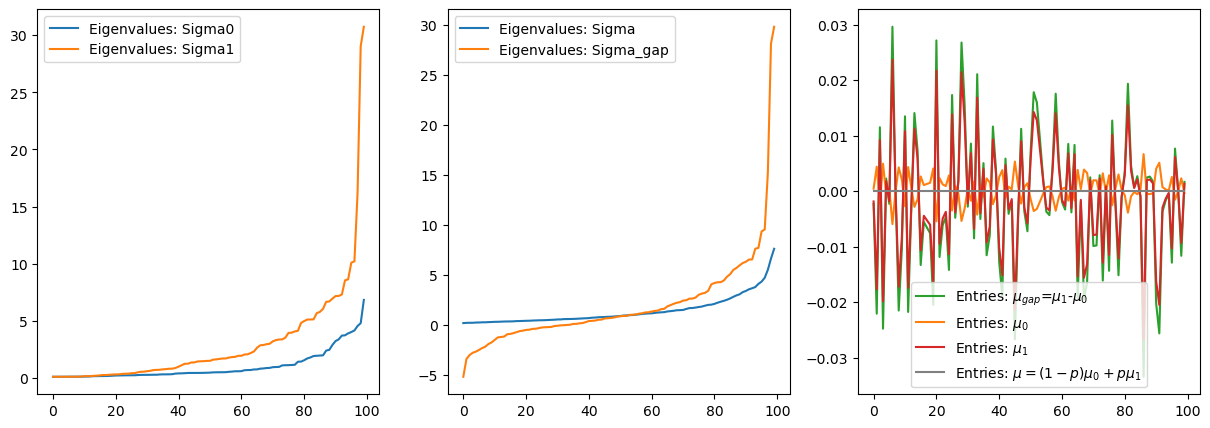

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

w0, _ = np.linalg.eigh(Algo.Sigma0)
w1, _ = np.linalg.eigh(Algo.Sigma1)
w, _ = np.linalg.eigh(Algo.Sigma)
wg, _ = np.linalg.eigh(Algo.Sigma_gap)

ax[0].plot(w0, label='Eigenvalues: Sigma0')
ax[0].plot(w1, label='Eigenvalues: Sigma1')
ax[0].legend()
ax[1].plot(w, label='Eigenvalues: Sigma')
ax[1].plot(wg,label='Eigenvalues: Sigma_gap')
ax[1].legend()
ax[2].plot(Algo.mu_gap, c='tab:green', label='Entries: $\mu_{gap}$=$\mu_1$-$\mu_0$')
ax[2].plot(Algo.mu0, c='tab:orange', label='Entries: $\mu_0$')
ax[2].plot(Algo.mu1, c='tab:red', label='Entries: $\mu_1$')
ax[2].plot(Algo.mu, c='gray', label='Entries: $\mu=(1-p)\mu_0 + p\mu_1$')
ax[2].legend()

## Offline Training

  0%|          | 0/100 [00:00<?, ?it/s]

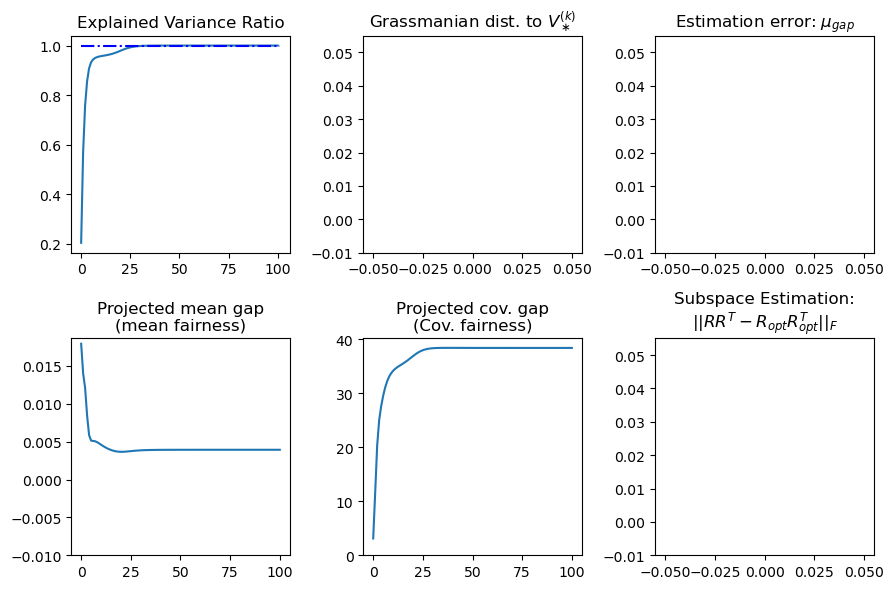

In [7]:
n_iter = 100
V = Algo.offline_train(
    target_dim=3,
    rank=10,
    n_iter=n_iter,
    lr=1,
    mode='pm',
    constraint='vanilla',
    seed=0,
    tol=0,
    #lr_scheduler=lambda t: 0.99**(t-1)
)
fig, axes = Algo.plot_buffer(save=None);  # semicolon
# Algo.plot_buffer(save=None, fig=fig, axes=axes); 
# fig

## Online Training

  0%|          | 0/50 [00:00<?, ?it/s]

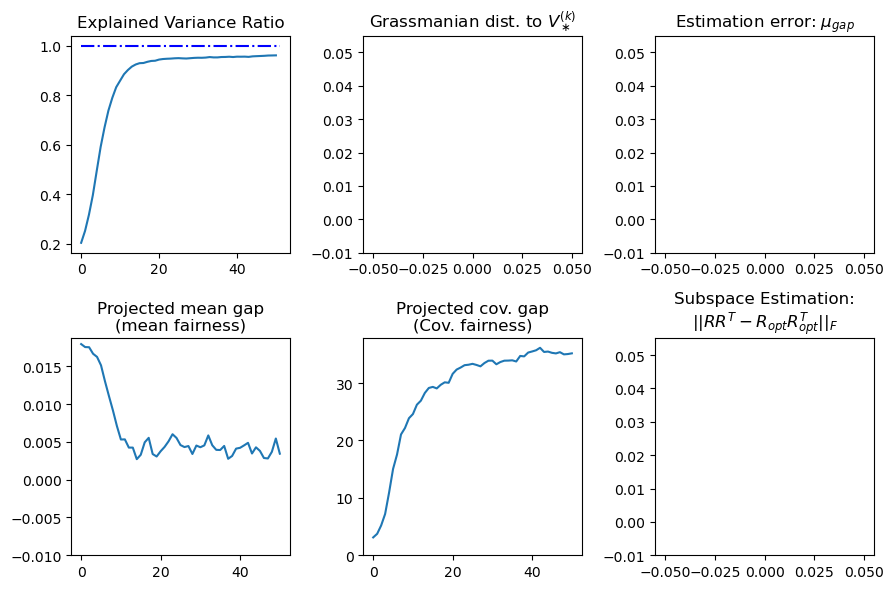

In [8]:
n_iter = 50
V = Algo.train(
    target_dim=3,
    rank=10,
    n_iter=n_iter,
    batch_size_subspace=None,
    batch_size_pca=1000,
    constraint='vanilla',
    subspace_optimization=None,
    pca_optimization='oja',
    lr_pca=0.1,
    n_iter_inner=1,
    seed=0,
    tol=0,
    # lr_scheduler=lambda t: 0.998**(t-1)
)
fig, axes = Algo.plot_buffer(save=None);  # semicolon
# Algo.plot_buffer(save=None, fig=fig, axes=axes); 
# fig

  0%|          | 0/50 [00:00<?, ?it/s]

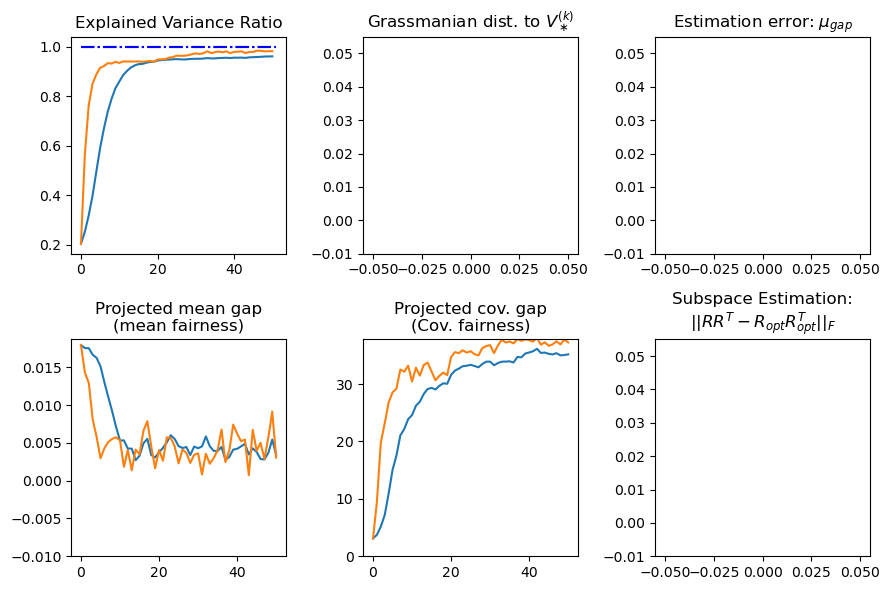

In [9]:
n_iter = 50
V = Algo.train(
    target_dim=3,
    rank=10,
    n_iter=n_iter,
    batch_size_subspace=None,
    batch_size_pca=1000,
    constraint='vanilla',
    subspace_optimization=None,
    pca_optimization='npm',
    lr_pca=None,
    n_iter_inner=1,
    seed=0,
    tol=0,
    # lr_scheduler=lambda t: 0.998**(t-1)
)
# fig, axes = Algo.plot_buffer(save=None);  # semicolon
Algo.plot_buffer(save=None, fig=fig, axes=axes); 
fig